In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

% matplotlib inline

In [22]:
import pandas as pd
filepath = '/Users/joudsi/Desktop/data_aki_bb_basicCleaning.csv'
data = pd.read_csv("/Users/joudsi/Desktop/data_aki_bb_basicCleaning.csv")

In [23]:
data.head()

,Unnamed: 0,admission_age,gender,dod,admission_type,curr_service,thirty_day_mort,hr,map,sbp,...,lactate,infection,explicit_sepsis,organ_dysfunction,mech_vent,angus,icd9_code,drug_name_generic,betablocker,aki
0,1,72.2671,M,2108-08-30 00:00:00,EMERGENCY,NMED,Y,54.0,89.0,12,...,6.9,1,0,0,1,1,3453,NaN,0,0
1,2,87.8263,M,2135-02-08 00:00:00,EMERGENCY,MED,Y,79.0,78.0,12,...,7.9,1,0,1,0,1,41071,NaN,0,0
2,3,87.8263,M,2135-02-08 00:00:00,EMERGENCY,MED,Y,79.0,78.0,12,...,7.9,1,0,1,0,1,41071,NaN,0,0
3,4,87.8263,M,2135-02-08 00:00:00,EMERGENCY,MED,Y,79.0,78.0,12,...,7.9,1,0,1,0,1,41071,NaN,0,0
4,5,87.8263,M,2135-02-08 00:00:00,EMERGENCY,MED,Y,79.0,78.0,12,...,7.9,1,0,1,0,1,41071,NaN,0,0


In [24]:
print("# of observations: ", str(len(data.index)))

('# of observations: ', '833233')


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833233 entries, 0 to 833232
Data columns (total 34 columns):
Unnamed: 0           833233 non-null int64
admission_age        833233 non-null float64
gender               833233 non-null object
dod                  589681 non-null object
admission_type       833233 non-null object
curr_service         833233 non-null object
thirty_day_mort      833233 non-null object
hr                   833233 non-null float64
map                  833233 non-null float64
sbp                  833233 non-null int64
temp                 833233 non-null int64
spo2                 833233 non-null float64
rr                   833233 non-null float64
cr                   833233 non-null int64
k                    833233 non-null float64
na                   833233 non-null float64
cl                   833233 non-null float64
bicarb               833233 non-null int64
hct                  833233 non-null float64
wbc                  833233 non-null float64
gluc

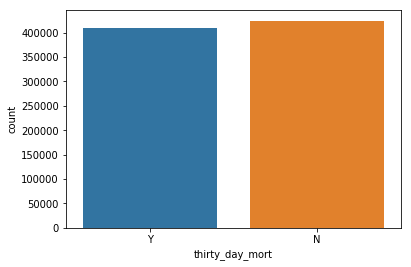

In [26]:
sns.countplot(x="thirty_day_mort", data=data)

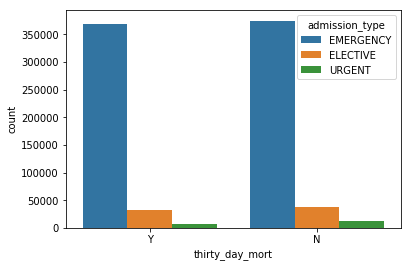

In [27]:
sns.countplot(x="thirty_day_mort", hue="admission_type",data=data)

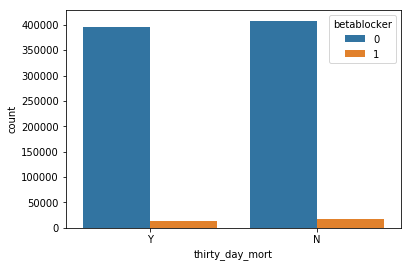

In [28]:
sns.countplot(x="thirty_day_mort", hue="betablocker",data=data)

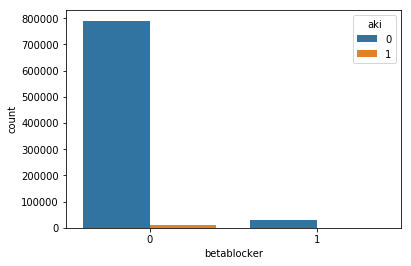

In [29]:
sns.countplot(x="betablocker", hue="aki",data=data)

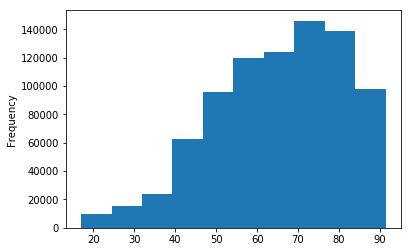

In [30]:
data["admission_age"].plot.hist()

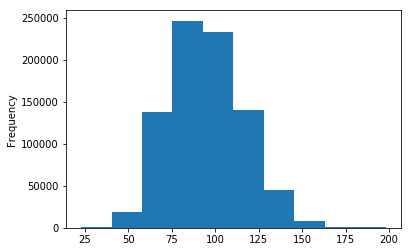

In [31]:
data["hr"].plot.hist()

In [32]:
data.drop(['gender', 'dod', 'admission_type', 'curr_service' , 'drug_name_generic', 'icd9_code' ] , axis=1, inplace=True)

In [33]:
X = data.drop("thirty_day_mort", axis=1)
Y = data["thirty_day_mort"]

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logmodel = LogisticRegression()

In [38]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
predictions = logmodel.predict(X_test)

In [41]:
from sklearn.metrics import classification_report

In [42]:
classification_report(y_test, predictions)

u'              precision    recall  f1-score   support\n\n           N       0.63      0.63      0.63    127332\n           Y       0.62      0.61      0.62    122638\n\n   micro avg       0.62      0.62      0.62    249970\n   macro avg       0.62      0.62      0.62    249970\nweighted avg       0.62      0.62      0.62    249970\n'

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_test, predictions)

array([[80434, 46898],
       [47233, 75405]])

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test, predictions)

0.6234308116974037